In [20]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [21]:
layers = {
    'mixed3a': 256,
    'mixed3b': 480,
    'mixed4a': 508,
    'mixed4b': 512,
    'mixed4c': 512,
    'mixed4d': 528,
    'mixed4e': 832,
    'mixed5a': 832,
    'mixed5b': 1024
}

with open('data/imagenet.json') as f:
    imagenet = json.load(f)

## Compute top channel usage statistics

In [22]:
top_channels = {}

for layer in list(layers.keys()):
    print(layer)
    top_channels[layer] = {
        'channels': layers[layer],
        'channels_used': 0,
        'channels_not_used': 0,
        'percent_channels_used': 0
    }
    all_channels = []
    
    for c in imagenet:
        for ch in c['topChannels'][layer]:
            all_channels.append(ch['channel'])
            
    (channels, counts) = np.unique(all_channels, return_counts=True)
    sorted_counts, sorted_channels = (list(t) for t in zip(*sorted(zip(counts, channels), reverse=True)))
    
    top_channels[layer]['channels_used'] = int(len(np.unique(sorted_channels)))
    top_channels[layer]['channels_not_used'] = layers[layer] - top_channels[layer]['channels_used']
    top_channels[layer]['percent_channels_used'] = top_channels[layer]['channels_used'] / layers[layer]

mixed3a
mixed3b
mixed4a
mixed4b
mixed4c
mixed4d
mixed4e
mixed5a
mixed5b


In [23]:
for layer in top_channels:
    print(layer)
    print(top_channels[layer])

mixed3a
{'channels': 256, 'channels_used': 140, 'channels_not_used': 116, 'percent_channels_used': 0.546875}
mixed3b
{'channels': 480, 'channels_used': 243, 'channels_not_used': 237, 'percent_channels_used': 0.50625}
mixed4a
{'channels': 508, 'channels_used': 393, 'channels_not_used': 115, 'percent_channels_used': 0.7736220472440944}
mixed4b
{'channels': 512, 'channels_used': 507, 'channels_not_used': 5, 'percent_channels_used': 0.990234375}
mixed4c
{'channels': 512, 'channels_used': 510, 'channels_not_used': 2, 'percent_channels_used': 0.99609375}
mixed4d
{'channels': 528, 'channels_used': 526, 'channels_not_used': 2, 'percent_channels_used': 0.9962121212121212}
mixed4e
{'channels': 832, 'channels_used': 713, 'channels_not_used': 119, 'percent_channels_used': 0.8569711538461539}
mixed5a
{'channels': 832, 'channels_used': 832, 'channels_not_used': 0, 'percent_channels_used': 1.0}
mixed5b
{'channels': 1024, 'channels_used': 1024, 'channels_not_used': 0, 'percent_channels_used': 1.0}


## Inspect top channels of the top channels

mixed3a


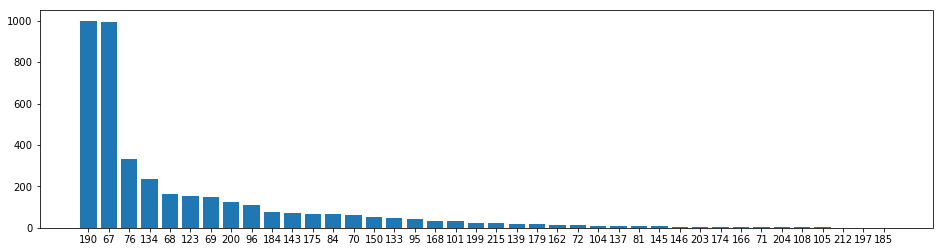

mixed3b


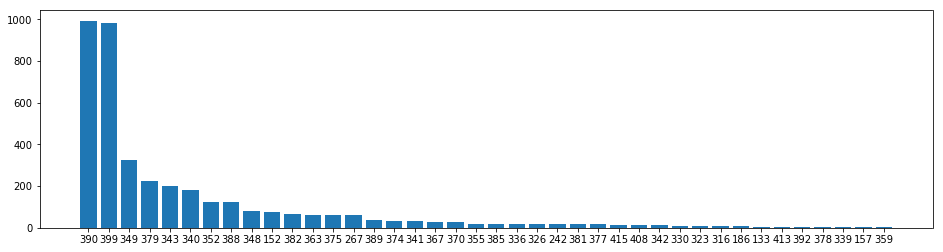

mixed4a


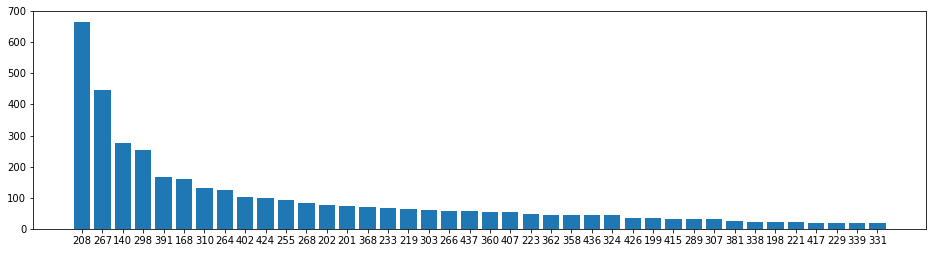

mixed4b


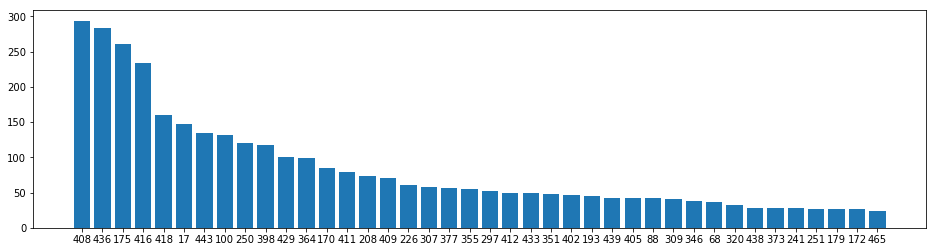

mixed4c


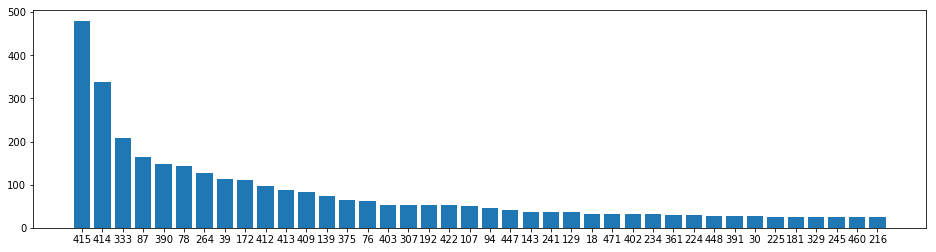

mixed4d


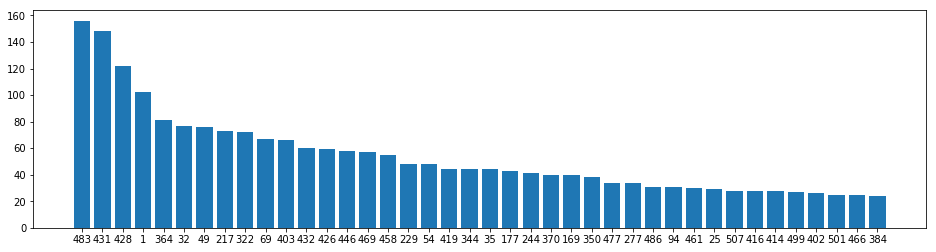

mixed4e


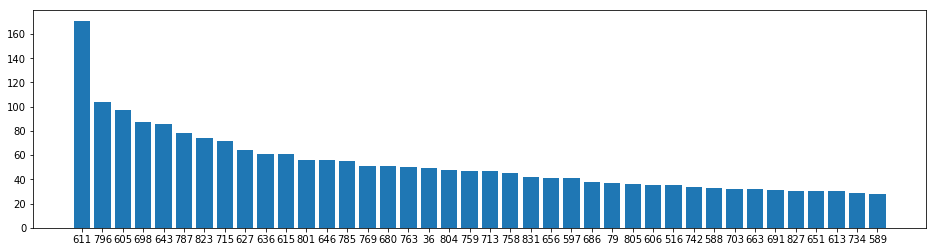

mixed5a


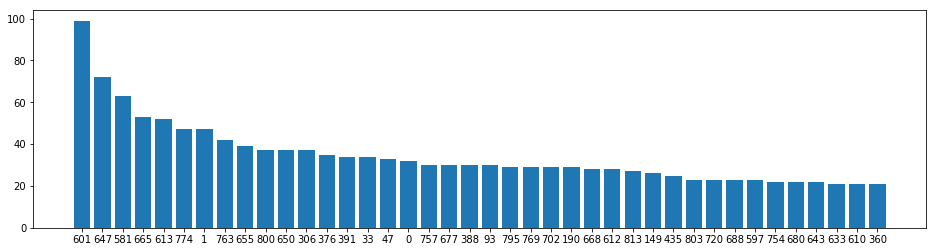

mixed5b


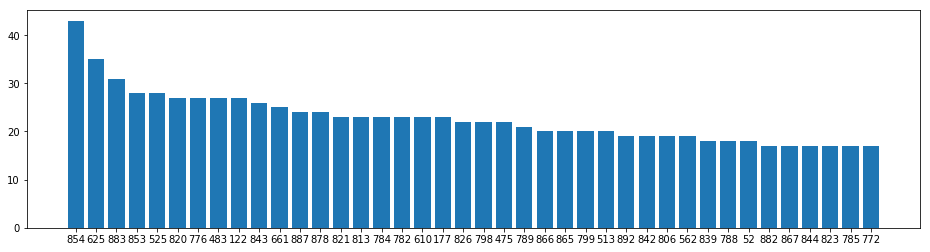

In [24]:
k = 4
end_idx = 40

top_channels = {}

for layer in list(layers.keys()):
    print(layer)
    top_channels[layer] = {
        'channels': layers[layer],
        'channels_used': 0,
        'channels_not_used': 0,
        'percent_channels_used': 0
    }
    all_channels = []
    
    for c in imagenet:
        for ch in c['topChannels'][layer][0:k]:
            all_channels.append(ch['channel'])
            
    (channels, counts) = np.unique(all_channels, return_counts=True)
    sorted_counts, sorted_channels = (list(t) for t in zip(*sorted(zip(counts, channels), reverse=True)))

    plt.figure(figsize=(16,4))
    plt.bar(
        range(len(sorted_channels[0:end_idx])),
        np.array(sorted_counts[0:end_idx]),
        align='center'
    )
    plt.xticks(range(len(sorted_channels[0:end_idx])),[str(x) for x in sorted_channels[0:end_idx]])
    plt.show()
    
    top_channels[layer]['channels_used'] = int(len(np.unique(sorted_channels)))
    top_channels[layer]['channels_not_used'] = layers[layer] - top_channels[layer]['channels_used']
    top_channels[layer]['percent_channels_used'] = top_channels[layer]['channels_used'] / layers[layer]